# Red giants and White dwarfs are not following the Law !

## Or how to study some stars on a rainy saturday morning !

Saturday morning. It's raining here in Brittany (West side of France). I was comfotably installed in my home and I just finished to read an article about the relationship between star mass and star temperature (http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/herrus.html#c3). It is mentionned that about 90% of the known stars have luminosties which follow the mass-luminosity relationship. Yeepeeeeee ! It sounds like a new data challenge for me. I will try to check this by myself.

In [385]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Publication')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Magic appears"></form>
''')


Some useful links:
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/

# Part I -  Thank you Mr Jakob Karl Ernst Halm.

##  1- State of the art : relation between star mass and star temperature

We know too that luminosity increases with the mass with the approximate law given by Jakob Karl Ernst Halm: $$ L = L_\odot \frac{M}{M_\odot}^{3.5}$$ where 
- L means lunminositie
- M means Mass
- and ⊙ is the symbol for our sun.

The value of the power 3.5 is most commonly used in astronomy for main-sequenced stars (with masses 2M⊙ < M < 55M⊙) but some recent articles use a relationship with a power between 1 and 6 (Salaris Maurizio and Santi Cassisi (2005), Evolution of stars and stellar populations). In fact the power 3.5 does not apply to red giants or white dwarfs.

The determination of a power relationship can be done by doing a log-log plot of the luminosities and masses. The slope of such a plot gives the power ! For example, the Royal Astronomical Society found a power of 3.95.

![alt text](images/Royal_slope.png "Title") 

Hummm... interesting to check :) I will try to see what could be the slope of some data I could find. So My next step is to find some open data to begin this work.

## 2- Data

After searching some datasets, I decided to use the *open exoplanet catalog* published by Megan Risdal on Kaggle (https://www.kaggle.com/mrisdal) because in this dataset we could find some information linked to the host star of the exoplanets. So we got some informations about stars. I found five columns describing stars: 
- the column #20 gives the star mass in Solar masses. Great ! I got directly one of the feature I was looking for. No need to divide the star mass by the solar mass, it is already done !
- the column #21 give the star radius in Solar radii. This feature could be interesting but for me it could be possible that it is higly correlated to the star mass. If the star is bigger than the sun maybe its mass and radius is high. We will verify this.
- the column #22 give the star metallicity in log relative to solar.  Metallicity is used to describe the abundance of elements present that are heavier than hydrogen or helium. This characteristic lead to a claasification of stars iin three populations : Population I (metal-rich), Population II (metal-poor), Population III (extremely metal-poor). This was theorized by W. Baade (1944), J.L. Puget and J. Heyvaerts (1980). This feature is not really important for my purpose.
- the column #23 gives the star temperature in Kelvin. This feature will be interesting. I will explain this later.
- the column #24 gives the host star age in Gigayear (Gyr). This feature could be interesting too.

So I will drop column 22 and keep the four other ones.

### Data importation

I will import the dataset found in Kaggle and check columns, I mean name and format. Sometimes names of columns are not the same as in description file.

In [1]:
import pandas as pd
data = pd.read_csv('data/oec.csv')
data.head(3)

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


### Data cleaning

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PlanetIdentifier      3584 non-null   object 
 1   TypeFlag              3584 non-null   int64  
 2   PlanetaryMassJpt      1313 non-null   float64
 3   RadiusJpt             2774 non-null   float64
 4   PeriodDays            3485 non-null   float64
 5   SemiMajorAxisAU       1406 non-null   float64
 6   Eccentricity          1108 non-null   float64
 7   PeriastronDeg         328 non-null    float64
 8   LongitudeDeg          43 non-null     float64
 9   AscendingNodeDeg      46 non-null     float64
 10  InclinationDeg        665 non-null    float64
 11  SurfaceTempK          741 non-null    float64
 12  AgeGyr                2 non-null      float64
 13  DiscoveryMethod       3521 non-null   object 
 14  DiscoveryYear         3574 non-null   float64
 15  LastUpdated          

Name of the columns are not the same as the description file. So, now I will design a dataframe containing the colums of interest for my purpose

In [3]:
df_stars = data[['HostStarMassSlrMass','HostStarRadiusSlrRad','HostStarTempK','HostStarAgeGyr']]
print('Shape of dataframe: ', df_stars.shape)

Shape of dataframe:  (3584, 4)


In [4]:
df_stars.head(3)

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,HostStarAgeGyr
0,0.889,1.362,5627.0,NaN
1,0.889,1.362,5627.0,NaN
2,0.460,0.450,3584.0,NaN


It seems that the age of stars is not allways filled. Let's have a look on how many missing values we have in this dataset:

In [5]:
df_stars.isnull().sum()

HostStarMassSlrMass      168
HostStarRadiusSlrRad     321
HostStarTempK            129
HostStarAgeGyr          3067
dtype: int64

I really need the first column, this is a principal feature to me, so I decide to drop all the rows with no value in  Star Mass column.

In [6]:
df_stars = df_stars[pd.notnull(df_stars['HostStarMassSlrMass'])]
print ('Number of null values in Star Mass:', df_stars['HostStarMassSlrMass'].isnull().sum(), 
       ' | Shape of dataframe: ', df_stars.shape)

Number of null values in Star Mass: 0  | Shape of dataframe:  (3416, 4)


In [7]:
df_stars.isnull().sum()

HostStarMassSlrMass        0
HostStarRadiusSlrRad     245
HostStarTempK             95
HostStarAgeGyr          2901
dtype: int64

Ok so we dropped the 168 missing values in star mass column. Now, for the rest of the study we will need star radius and star temperature. So, we have to drop missing values too.

In [8]:
df_stars = df_stars[pd.notnull(df_stars['HostStarRadiusSlrRad'])]
df_stars.isnull().sum()

HostStarMassSlrMass        0
HostStarRadiusSlrRad       0
HostStarTempK             52
HostStarAgeGyr          2696
dtype: int64

In [9]:
df_stars = df_stars[pd.notnull(df_stars['HostStarTempK'])]
df_stars.isnull().sum()

HostStarMassSlrMass        0
HostStarRadiusSlrRad       0
HostStarTempK              0
HostStarAgeGyr          2663
dtype: int64

In [10]:
print ('Shape of dataframe: ', df_stars.shape)

Shape of dataframe:  (3119, 4)


I will replace the 2663 missing values of age of stars by zero, which of course means nothing.

In [11]:
df_stars.fillna(0, inplace=True)
df_stars.isnull().sum()

HostStarMassSlrMass     0
HostStarRadiusSlrRad    0
HostStarTempK           0
HostStarAgeGyr          0
dtype: int64

In [12]:
df_stars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3119 entries, 0 to 3583
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HostStarMassSlrMass   3119 non-null   float64
 1   HostStarRadiusSlrRad  3119 non-null   float64
 2   HostStarTempK         3119 non-null   float64
 3   HostStarAgeGyr        3119 non-null   float64
dtypes: float64(4)
memory usage: 121.8 KB


Ok so now we have a dataset with non missing-values, we are ready to begin data exploration.

### Data exploration

In [13]:
import matplotlib.pyplot as plt

In [14]:
df_stars.describe()

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,HostStarAgeGyr
count,3119.000000,3119.000000,3119.000000,3119.000000
mean,0.991919,1.502908,5513.255082,0.659335
std,0.294734,3.130632,1220.849348,2.009423
min,0.057200,0.089000,2205.000000,0.000000
25%,0.850000,0.810000,5107.500000,0.000000
50%,0.980000,0.990000,5627.000000,0.000000
75%,1.110000,1.240000,5944.500000,0.000000
max,4.500000,51.100000,29300.000000,13.900000


We could see with statistical description of the dataset, that we have most of the stars with the same mass as our sun and with a temperature around 5513 Kelvin. The temperature of our sun is 5778 K.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4340f82510>,
      dtype=object)

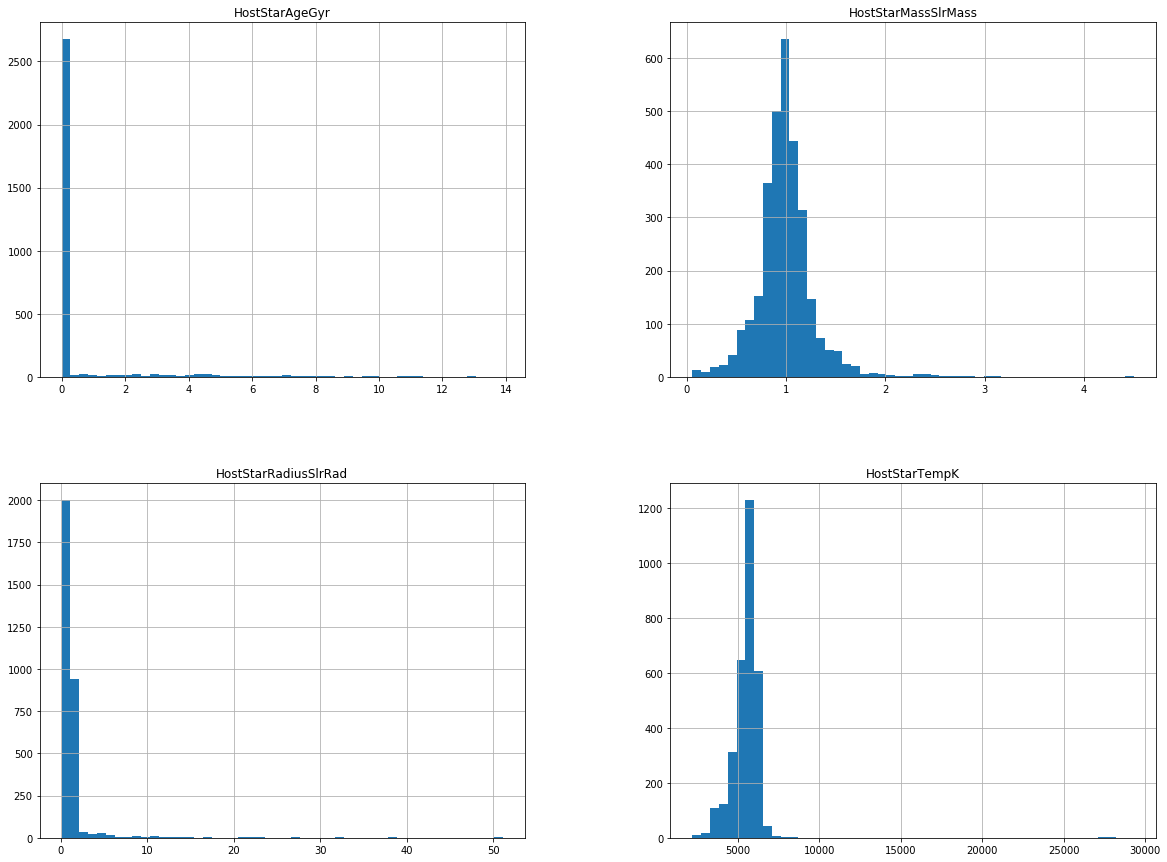

In [15]:
df_stars.hist(bins=50, figsize=(20,15))

## 3- Mass-Luminosity relation

So now, we could build our chart and find the value of the slope. In order to do that, we need to calculate Luminosity. 
We know that :
$$ \frac{L}{L_\odot} = (\frac{R}{R_\odot})^{2}(\frac{T}{T_\odot})^{4} $$
So, we will use star radius and star temperature to calculate the ratio of luminosity.
The star radius is given in sun radius, so we have already our ratio and I gave the sun Lumnosity above, 5778K.

In [19]:
df_stars['HostStarLumSlrLum_Theor'] = (df_stars.HostStarRadiusSlrRad ** 2) * ((df_stars.HostStarTempK/5778) ** 4)

In [20]:
df_stars.head(10)

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,HostStarAgeGyr,HostStarLumSlrLum_Theor
0,0.889,1.362,5627.0,0.0,1.668598
1,0.889,1.362,5627.0,0.0,1.668598
2,0.460,0.450,3584.0,0.0,0.029977
3,0.460,0.450,3584.0,0.0,0.029977
4,0.460,0.450,3584.0,0.0,0.029977
5,1.070,1.020,5777.0,0.0,1.039680
6,1.070,1.020,5777.0,0.0,1.039680
7,1.070,1.020,5777.0,0.0,1.039680
9,0.830,0.790,5132.0,0.0,0.388410
13,0.950,0.930,5759.0,0.0,0.853580


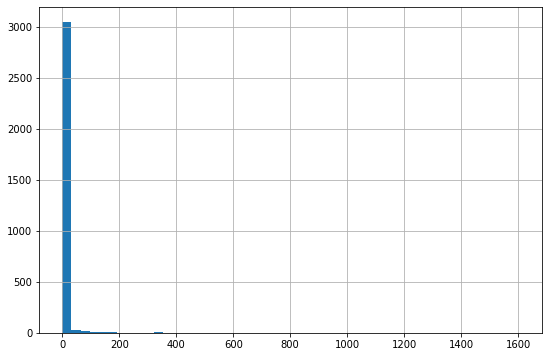

In [21]:
df_stars['HostStarLumSlrLum_Theor'].hist(bins=50, figsize=(9,6))

Some values are equal to 200 ! That's so weird. Let's have a look on that on checking if our formula is correct for the first row.

In [22]:
# Calculation of L/Lsun for the row
l = 1.362**2*(5627/5778)**4
error = ((l-df_stars['HostStarLumSlrLum_Theor'][0])/abs(df_stars['HostStarLumSlrLum_Theor'][0]))*100
print('Calculation of ratio for first row: ', l, ' | LuminositySlrLum for first row: ', df_stars['HostStarLumSlrLum_Theor'][0])
print('Relative error: ', error, '%')

Calculation of ratio for first row:  1.668598027043851  | LuminositySlrLum for first row:  1.6685980270438503
Relative error:  3.992176689524445e-14 %


My formula seems correct. So some stars give really huge values. Let's have a look to these stars. I will select stars having a luminosity ratio > 10.

In [23]:
df_stars[df_stars['HostStarLumSlrLum_Theor'] > 10].count()

HostStarMassSlrMass        134
HostStarRadiusSlrRad       134
HostStarTempK              134
HostStarAgeGyr             134
HostStarLumSlrLum_Theor    134
dtype: int64

134 stars on 3119 have a ratio > 10. These stars are really big as we could see on the following table.

In [24]:
df_stars['HostStarRadiusSlrRad'][df_stars['HostStarLumSlrLum_Theor'] > 10]

70      22.90
86       5.50
99      38.30
131     12.02
193      2.55
        ...  
3533     6.20
3560     2.30
3561     2.30
3579    14.30
3580    14.30
Name: HostStarRadiusSlrRad, Length: 134, dtype: float64

The formula of litterature suggest to use log/log charts. Due to the log power rule we could easily find the slope of the line.

In [25]:
import seaborn as sns
import numpy as np

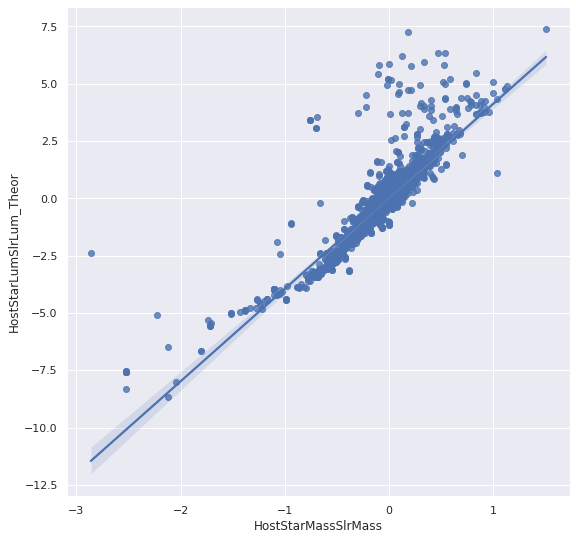

In [26]:
sns.set(color_codes=True)
ax = plt.subplots(figsize=(9, 9))
ax = sns.regplot(x=np.log(df_stars['HostStarMassSlrMass']), 
                 y=np.log(df_stars['HostStarLumSlrLum_Theor']),
                 y_jitter=.03)


Seaborn library could no print the slope of the plot so we have to use scikit-learn library to do that. I will create two columns on the dataframe containing the log values.

In [27]:
df_stars['HostStarMassLogSlrMass'] = np.log(df_stars['HostStarMassSlrMass'])
df_stars['HostStarLumLogSlrLum_Theor'] = np.log(df_stars['HostStarLumSlrLum_Theor'])
df_stars.head(3)

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,HostStarAgeGyr,HostStarLumSlrLum_Theor,HostStarMassLogSlrMass,HostStarLumLogSlrLum_Theor
0,0.889,1.362,5627.0,0.0,1.668598,-0.117658,0.511984
1,0.889,1.362,5627.0,0.0,1.668598,-0.117658,0.511984
2,0.460,0.450,3584.0,0.0,0.029977,-0.776529,-3.507328


In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = df_stars.HostStarMassLogSlrMass.values.reshape(-1,1)
y = df_stars.HostStarLumLogSlrLum_Theor.values.reshape(-1,1)
regr.fit(X, y)
print(regr.coef_[0])
print(regr.intercept_)

[4.03661584]
[0.0978275]


To include that in the plot we have to overlap a textbox on the plot:

Text(0.2, 0.9, 'Slope = 4.036')

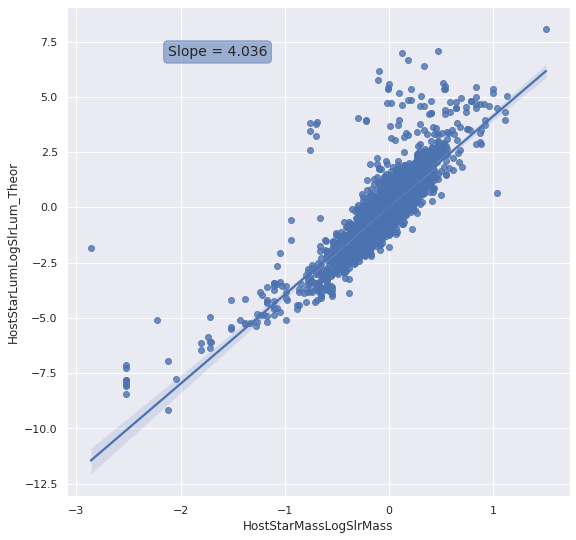

In [29]:
sns.set(color_codes=True)
ax = plt.subplots(figsize=(9, 9))
ax = sns.regplot(x=df_stars['HostStarMassLogSlrMass'], 
                 y=df_stars['HostStarLumLogSlrLum_Theor'],
                 y_jitter=.9)
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'Slope = 4.036'
ax.text(0.2, 0.9, textstr, transform=ax.transAxes, fontsize=14, bbox=props)

Now, I would like to know if 90% of the stars known (as described in the article) are following the mass-luminosity relationship. Let's apply this to my dataset. 

A linear regression predicts the avergae y value associated to a given x value. But it is necessary to get a measure of the spread of the y values around that avaergae. To do this, we use the root mean sqaure error (RMS). In order to calculate RMS, we need to determine residuals (difference between actual values and predicted values). They can be positive or negative value. Squaring the residuals, averaging the saures and taking the square root gives us the RMS.

 we can usually expect 68% of the values to be within one RMS error and 95% to be within two RMS. I will use this to see if 90% of the stars of the dataset are between 2 RMS.

In [30]:
from math import sqrt
slope=4.03661584
intercept=0.0978275

pred = df_stars['HostStarLumLogSlrLum_Model'] = df_stars['HostStarMassLogSlrMass']*slope + intercept
residuals = (df_stars['HostStarLumLogSlrLum_Model'] - df_stars['HostStarLumLogSlrLum_Theor'])
df_stars['ResidualsLumLogSlrLum'] = residuals

RMS = ((df_stars['ResidualsLumLogSlrLum']**2).sum()/df_stars['ResidualsLumLogSlrLum'].count())**0.5
print('RMS: ', RMS)

RMS:  0.7065610361563747


I will create two columns containing my inferior limit --2RMS) and superior limit (+2RMS)

In [31]:
df_stars['-2RMS'] = df_stars['HostStarLumLogSlrLum_Model'] - 2*RMS
df_stars['+2RMS'] = df_stars['HostStarLumLogSlrLum_Model'] + 2*RMS
df_stars

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,HostStarAgeGyr,HostStarLumSlrLum_Theor,HostStarMassLogSlrMass,HostStarLumLogSlrLum_Theor,HostStarLumLogSlrLum_Model,ResidualsLumLogSlrLum,-2RMS,+2RMS
0,0.889,1.362,5627.0,0.0,1.668598,-0.117658,0.511984,-0.377113,-0.889097,-1.790235,1.036009
1,0.889,1.362,5627.0,0.0,1.668598,-0.117658,0.511984,-0.377113,-0.889097,-1.790235,1.036009
2,0.460,0.450,3584.0,0.0,0.029977,-0.776529,-3.507328,-3.036721,0.470607,-4.449843,-1.623599
3,0.460,0.450,3584.0,0.0,0.029977,-0.776529,-3.507328,-3.036721,0.470607,-4.449843,-1.623599
4,0.460,0.450,3584.0,0.0,0.029977,-0.776529,-3.507328,-3.036721,0.470607,-4.449843,-1.623599
...,...,...,...,...,...,...,...,...,...,...,...
3579,1.700,14.300,4528.0,0.0,77.123654,0.530628,4.345410,2.239770,-2.105640,0.826648,3.652892
3580,1.700,14.300,4528.0,0.0,77.123654,0.530628,4.345410,2.239770,-2.105640,0.826648,3.652892
3581,1.000,1.220,5407.0,0.0,1.141392,0.000000,0.132249,0.097827,-0.034421,-1.315295,1.510950
3582,1.000,1.220,5407.0,0.0,1.141392,0.000000,0.132249,0.097827,-0.034421,-1.315295,1.510950


In [32]:
stars_outside = df_stars['HostStarMassSlrMass'][(df_stars['HostStarLumLogSlrLum_Theor'] < df_stars['-2RMS'])|
                                                (df_stars['HostStarLumLogSlrLum_Theor'] > df_stars['+2RMS'])].count()

stars_all = df_stars['HostStarMassSlrMass'].count()
print (stars_outside,' stars are outside + or - 2RMS. The percentage of stars not following the mass-luminosity = ', 
       round(stars_outside/stars_all*100), '%')

90  stars are outside + or - 2RMS. The percentage of stars not following the mass-luminosity =  3.0 %


In [33]:
df_stars['RelationMassLum'] = np.where((df_stars['HostStarLumLogSlrLum_Theor'] > df_stars['-2RMS']) & 
                                       (df_stars['HostStarLumLogSlrLum_Theor'] < df_stars['+2RMS']), 
                                       'correct', 'incorrect')

df_stars[df_stars['RelationMassLum'] == 'incorrect']

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,HostStarAgeGyr,HostStarLumSlrLum_Theor,HostStarMassLogSlrMass,HostStarLumLogSlrLum_Theor,HostStarLumLogSlrLum_Model,ResidualsLumLogSlrLum,-2RMS,+2RMS,RelationMassLum
16,0.176,0.2213,3250.0,0.000,0.004902,-1.737271,-5.318082,-6.914869,-1.596787,-8.327991,-5.501747,incorrect
68,0.830,1.6000,6040.0,0.000,3.056874,-0.186330,1.117393,-0.654313,-1.771706,-2.067435,0.758809,incorrect
69,0.830,1.6000,6040.0,0.000,3.056874,-0.186330,1.117393,-0.654313,-1.771706,-2.067435,0.758809,incorrect
70,1.680,22.9000,4300.0,0.000,160.855027,0.518794,5.080504,2.191999,-2.888505,0.778877,3.605121,incorrect
99,1.400,38.3000,4126.0,2.950,381.420730,0.336472,5.943903,1.456037,-4.487866,0.042915,2.869159,incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...
3403,1.700,21.0000,4406.0,1.740,149.109877,0.530628,5.004683,2.239770,-2.764914,0.826648,3.652892,incorrect
3509,1.234,18.1100,4415.0,4.604,111.802002,0.210261,4.716729,0.946570,-3.770159,-0.466552,2.359692,incorrect
3571,1.070,4.1400,4806.0,0.000,8.203999,0.067659,2.104622,0.370939,-1.733682,-1.042183,1.784062,incorrect
3579,1.700,14.3000,4528.0,0.000,77.123654,0.530628,4.345410,2.239770,-2.105640,0.826648,3.652892,incorrect


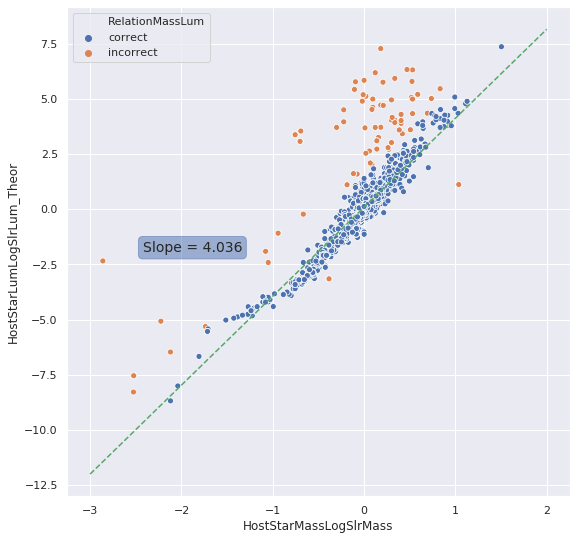

In [34]:
sns.set(color_codes=True)
ax = plt.subplots(figsize=(9, 9))
ax = sns.scatterplot(x=df_stars['HostStarMassLogSlrMass'], 
                 y=df_stars['HostStarLumLogSlrLum_Theor'],
                 hue=df_stars['RelationMassLum'],
                 y_jitter=.03)
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'Slope = 4.036'
ax.text(0.15, 0.5, textstr, transform=ax.transAxes, fontsize=14, bbox=props)

# Plot the regression line for x=-3 and x = 2
slope = 4.03661584
intercept = 0.0978275
ya = -3 * slope + intercept
yb = 2 * slope + intercept
ax.plot((-3,2),(ya,yb), color='g', linestyle='--')

### Conclusion
We found a slope equal to 4.036 which confirm the mass-luminosity relationship. This slope is nearest the Royal Astronomical Society (3.95) than the standard one (3.5).

I found that 3% of stars are not following the mass-luminosity relationship (on an interval of + or -2 RMS), meaning 97% are following it, which is aligned with the 90% given by the article ! 

We know that this equation and the usual value of a = 3.5 only applies to main-sequence stars with masses 2M⊙ < M < 55M⊙ and does not apply to red giants or white dwarfs. Maybe we could determine if stars not following our model are red giants or white dwarfs ?

That will be the purpose of Part II of this work.

# Part II - Thank you Mr Ejnar Hertzsprung and Mr Henry Norris Russell.

In order to find red giants and white dwarfs it could be useful to acquire some knowledge on these stars.
- Red giant is the old age of low or intermediate mass star (roughly 0.3 to 8 solar masses, M☉).
- White dwarf is one final evolutionary state of red giant star. Thanks to Wikipedia (https://en.wikipedia.org/wiki/White_dwarf), they are known with estimated masses as low as 0.17 M☉ and as high as 1.33 M☉ and the mass distribution is strongly peaked at 0.6 M☉.

It could be useful to remember the star life cycle as shown in the following chart.

![title](images/Star_Life_Cycle_Chart.jpg)

So, in order to identify our red giants and white dwarfs, we could use the mass of the stars. But another interesting tool exist as I will explain below.

## 1- The Hertzsprung–Russell diagram (H–R diagram)

As maybe you understood, I definitely like astronomy (few years ago, I followed the great curse given by Frederic Courbin, senior scientist at EPFL) and I remember that the Hertzsprung–Russell diagram (H–R diagram) shows the relationship between the stars' absolute magnitudes (luminosities) versus their stellar classifications (effective temperatures). 

![alt text](images/HR_Diagram.png)

In this chart we could easily see that stars could be classified by using the luminosity (in solar units), the surface temperature (in Kelvin) and the star radius (in Solar Radius).

- Red giants have :
    - a luminosity between 10 to 10<sup>4</sup> Solar units,
    - a temperature between 2 000 to 6 000 Kelvin,
    - a radius between 10 to 10<sup>2</sup> Solar Radius.
- White dwarfs have :
    - a luminosity between 10<sup>-4</sup> to 1 Solar units,
    - a temperature between 6 000 to 30 000 Kelvin,
    - a radius around 10<sup>-2</sup> Solar Radius.
    
We got all these features in our datasets. So we will look for these stars and check if they have an incorrect relationship between mass and luminosity.

In [35]:
rg_count = df_stars['HostStarMassSlrMass'][(df_stars['HostStarLumSlrLum_Theor'] > 10) & 
         (df_stars['HostStarLumSlrLum_Theor'] < 10000) & 
         (df_stars['HostStarTempK'] > 2000) &
         (df_stars['HostStarTempK'] < 6000) &
         (df_stars['HostStarRadiusSlrRad'] > 10) &
         (df_stars['HostStarRadiusSlrRad'] < 100 )         
        ].count()

df_stars['RedGiant'] = np.where((df_stars['HostStarLumSlrLum_Theor'] > 10) & 
         (df_stars['HostStarLumSlrLum_Theor'] < 10000) & 
         (df_stars['HostStarTempK'] > 2000) &
         (df_stars['HostStarTempK'] < 6000) &
         (df_stars['HostStarRadiusSlrRad'] > 10) &
         (df_stars['HostStarRadiusSlrRad'] < 100 ), '1', '0')

print('Number of possible Red Giants: ', rg_count, 
      ' | Number of Red Giants on Column: ', df_stars['HostStarMassSlrMass'][df_stars['RedGiant'] == '1'].count())

rg_incorrect_count = df_stars['HostStarMassSlrMass'][(df_stars['RedGiant'] == '1') &
                                                       (df_stars['RelationMassLum'] == 'incorrect')].count()

print('Number of possible Red Giants with an incorrect mass-luminosity relationship: ', rg_incorrect_count)

Number of possible Red Giants:  58  | Number of Red Giants on Column:  58
Number of possible Red Giants with an incorrect mass-luminosity relationship:  39


In [36]:
wd_count = df_stars['HostStarMassLogSlrMass'][(df_stars['HostStarLumSlrLum_Theor'] > 0.0001) & 
         (df_stars['HostStarLumSlrLum_Theor'] < 1) & 
         (df_stars['HostStarTempK'] > 6000) &
         (df_stars['HostStarTempK'] < 30000) &
         (df_stars['HostStarRadiusSlrRad'] > 0.001) &
         (df_stars['HostStarRadiusSlrRad'] < 0.1 )         
        ].count()

df_stars['WhiteDwarf']=np.where((df_stars['HostStarLumSlrLum_Theor'] > 0.0001) & 
         (df_stars['HostStarLumSlrLum_Theor'] < 1) & 
         (df_stars['HostStarTempK'] > 6000) &
         (df_stars['HostStarTempK'] < 30000) &
         (df_stars['HostStarRadiusSlrRad'] > 0.001) &
         (df_stars['HostStarRadiusSlrRad'] < 0.1 ), '1', '0')

print('Number of possible White Dwarfs: ', wd_count,
     ' | Number of White Dwarfs on Column: ', df_stars['HostStarMassSlrMass'][df_stars['WhiteDwarf'] == '1'].count())

wd_incorrect_count = df_stars['HostStarMassLogSlrMass'][(df_stars['WhiteDwarf'] == '1') &
                                                       (df_stars['RelationMassLum'] == 'incorrect')].count()

print('Number of possible White Dwarfs with an incorrect mass-luminosity relationship: ', wd_incorrect_count)

Number of possible White Dwarfs:  0  | Number of White Dwarfs on Column:  0
Number of possible White Dwarfs with an incorrect mass-luminosity relationship:  0


It seems that we have 58 red giants where 39 are classified as incorrect. We have none white dwarfs in our dataset.
To be sure I will represent the H-R diagram.

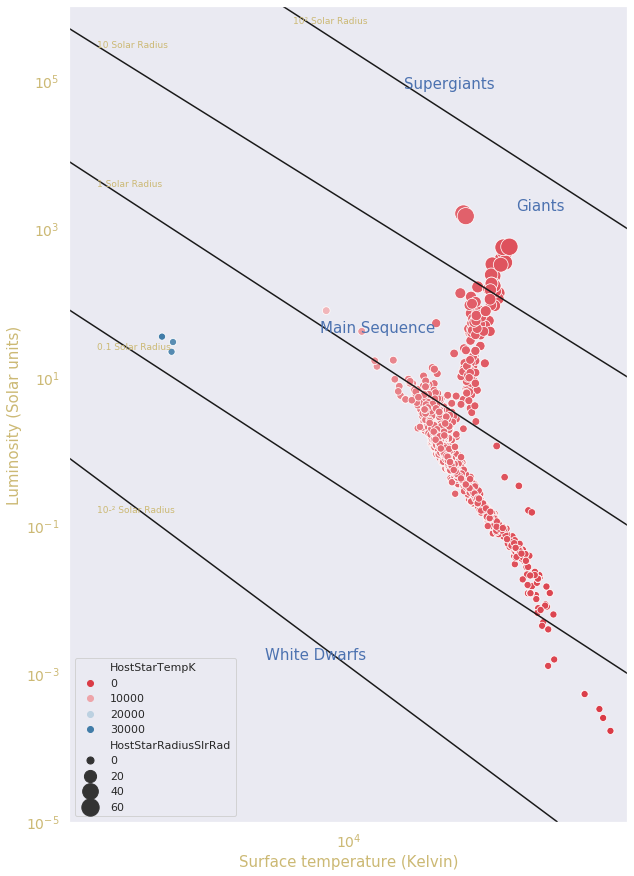

In [37]:
cmap = sns.diverging_palette(10, 240, n=9, as_cmap=True)

ax = plt.subplots(figsize=(10, 15))

ax = sns.scatterplot(x=df_stars['HostStarTempK'], 
                 y=df_stars['HostStarLumSlrLum_Theor'],
                 hue=df_stars['HostStarTempK'], 
                 size=df_stars['HostStarRadiusSlrRad'],
                 sizes=(50, 300),
                 palette=cmap)


ax.text(0.6, 0.9, 'Supergiants', color='b', transform=ax.transAxes, fontsize=15)
ax.text(0.8, 0.75, 'Giants', color='b', transform=ax.transAxes, fontsize=15)
ax.text(0.45, 0.6, 'Main Sequence', color='b', transform=ax.transAxes, fontsize=15)
ax.text(0.35, 0.2, 'White Dwarfs', color='b', transform=ax.transAxes, fontsize=15)


# Plot the Solar radius lines
ax.plot((2000,20000),(1000,3000000), color='k', linestyle='-')
ax.plot((2000,50000),(10,500000), color='k', linestyle='-') 
ax.plot((2000,50000),(0.1,8000), color='k', linestyle='-') 
ax.plot((2000,50000),(0.001,80), color='k', linestyle='-') 
ax.plot((3000,50000),(0.00001,0.8), color='k', linestyle='-')

ax.text(0.4, 0.98, '10² Solar Radius', color='y', transform=ax.transAxes, fontsize=9)
ax.text(0.05, 0.95, '10 Solar Radius', color='y', transform=ax.transAxes, fontsize=9)
ax.text(0.05, 0.78, '1 Solar Radius', color='y', transform=ax.transAxes, fontsize=9)
ax.text(0.05, 0.58, '0.1 Solar Radius', color='y', transform=ax.transAxes, fontsize=9)
ax.text(0.05, 0.38, '10-² Solar Radius', color='y', transform=ax.transAxes, fontsize=9)

# Change Y axis limit to be in same settings as H-R diagram
ax.set(ylim=(0.00001, 1000000))
ax.set(yscale='log')
ax.set(xlim=(2000, 50000))
ax.set(xscale='log')

# Change tick and labels of axis in Yellow
ax.tick_params(axis='x', colors='y', labelsize=14)
ax.tick_params(axis='y', colors='y', labelsize=14)
ax.yaxis.label.set_color('y')
ax.xaxis.label.set_color('y')
ax.yaxis.label.set_fontsize(15)
ax.xaxis.label.set_fontsize(15)

# Change name of labels
plt.xlabel('Surface temperature (Kelvin)')
plt.ylabel('Luminosity (Solar units)')

# Inversion of axis X to be in same settings as H-R diagram
ax.invert_xaxis()
ax.legend()
ax.grid(False)

plt.style.use("dark_background")





The diagram shows us that we have effectively no White Dwarfs and several candidates to be Reg Giants. Let's have a look to these red giants and how they are located in the previous mass-luminosity chart.

In [38]:
df_stars['rg_incorrect'] = np.where((df_stars['RedGiant'] == '1') &
                                    (df_stars['RelationMassLum'] == 'incorrect'),'true','false')

In [39]:
df_stars[df_stars['RedGiant'] == '1']

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,HostStarAgeGyr,HostStarLumSlrLum_Theor,HostStarMassLogSlrMass,HostStarLumLogSlrLum_Theor,HostStarLumLogSlrLum_Model,ResidualsLumLogSlrLum,-2RMS,+2RMS,RelationMassLum,RedGiant,WhiteDwarf,rg_incorrect
70,1.680,22.90,4300.0,0.000,160.855027,0.518794,5.080504,2.191999,-2.888505,0.778877,3.605121,incorrect,1,0,true
99,1.400,38.30,4126.0,2.950,381.420730,0.336472,5.943903,1.456037,-4.487866,0.042915,2.869159,incorrect,1,0,true
131,2.500,12.02,4844.0,0.000,71.369939,0.916291,4.267877,3.796541,-0.471336,2.383419,5.209663,correct,1,0,false
292,1.100,22.00,4305.0,0.000,149.151572,0.095310,5.004963,0.482558,-4.522405,-0.930564,1.895680,incorrect,1,0,true
476,2.000,13.50,4683.0,0.000,78.641904,0.693147,4.364905,2.895796,-1.469108,1.482674,4.308918,incorrect,1,0,true
493,4.500,50.39,5150.0,0.000,1602.534850,1.504077,7.379342,6.169210,-1.210132,4.756088,7.582332,correct,1,0,false
563,1.230,31.88,4330.0,0.000,320.536921,0.207014,5.769997,0.933464,-4.836533,-0.479658,2.346586,incorrect,1,0,true
694,2.700,19.00,4742.0,0.000,163.773357,0.993252,5.098484,4.107203,-0.991280,2.694081,5.520325,correct,1,0,false
749,1.400,12.80,4445.0,0.000,57.384797,0.336472,4.049779,1.456037,-2.593743,0.042915,2.869159,incorrect,1,0,true
810,2.130,10.50,4749.0,0.000,50.312642,0.756122,3.918256,3.150001,-0.768255,1.736879,4.563124,correct,1,0,false


Let's verify how many of these red giants are not following the law and how they are in the mass-luminosity chart drawn before.

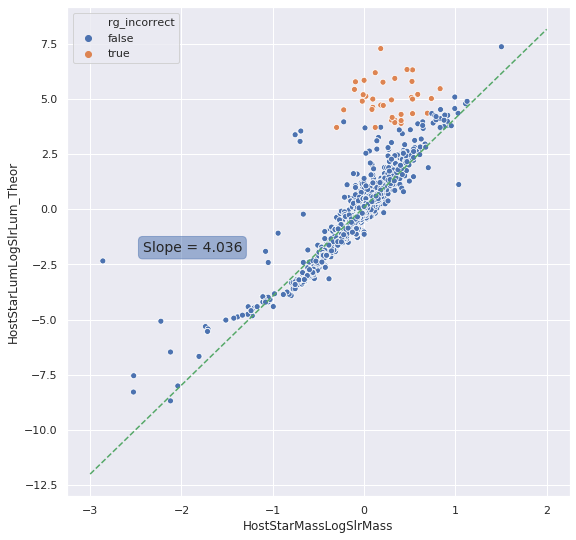

In [40]:
sns.set(color_codes=True)
ax = plt.subplots(figsize=(9, 9))
ax = sns.scatterplot(x=df_stars['HostStarMassLogSlrMass'], 
                 y=df_stars['HostStarLumLogSlrLum_Theor'],
                 hue=df_stars['rg_incorrect'],
                 y_jitter=.03)
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'Slope = 4.036'
ax.text(0.15, 0.5, textstr, transform=ax.transAxes, fontsize=14, bbox=props)

# Plot the regression line for x=-3 and x = 2
slope = 4.03661584
intercept = 0.0978275
ya = -3 * slope + intercept
yb = 2 * slope + intercept
ax.plot((-3,2),(ya,yb), color='g', linestyle='--')

The diagram shows three points (blue stars) with high temperature and a radius which seems to be near 0.1. In fact they are 6 but with very similar data :
- their mass are half of our sun, between 0.47 and 0.50 our sun mass,
- their radius are between 0.203 and 0.240,
- their temperature are between 27 500 and 29 300 Kelvin,
- their Luminosity theorical (given by formula) are between 21.86 and 34.97 Solar units.

All of these stars are not following the mass-luminosity relationship (incorrect appears in the column designed before) and they are very difficult to identify following the H-R diagram or The Harvard spectral classification (https://simple.wikipedia.org/wiki/Stellar_classification). I don't know what kind of stars they are ! I will see where they appear in our previous chart. For that, I will create a new feature called 'Unusual'.

In [41]:
df_stars['Unusual'] = np.where((df_stars['HostStarTempK'] > 25000) & (df_stars['HostStarLumSlrLum_Theor'] > 10), '1', '0')
df_stars[df_stars['Unusual'] == '1']

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,HostStarAgeGyr,HostStarLumSlrLum_Theor,HostStarMassLogSlrMass,HostStarLumLogSlrLum_Theor,HostStarLumLogSlrLum_Model,ResidualsLumLogSlrLum,-2RMS,+2RMS,RelationMassLum,RedGiant,WhiteDwarf,rg_incorrect,Unusual
2780,0.496,0.203,27730.0,0.0,21.861573,-0.701179,3.084730,-2.732564,-5.817295,-4.145686,-1.319442,incorrect,0,0,false,1
2781,0.496,0.203,27730.0,0.0,21.861573,-0.701179,3.084730,-2.732564,-5.817295,-4.145686,-1.319442,incorrect,0,0,false,1
2857,0.500,0.230,29300.0,0.0,34.979694,-0.693147,3.554768,-2.700141,-6.254909,-4.113263,-1.287019,incorrect,0,0,false,1
2894,0.470,0.240,27500.0,0.0,29.555827,-0.755023,3.386281,-2.949909,-6.336190,-4.363031,-1.536787,incorrect,0,0,false,1
2895,0.470,0.240,27500.0,0.0,29.555827,-0.755023,3.386281,-2.949909,-6.336190,-4.363031,-1.536787,incorrect,0,0,false,1
2896,0.470,0.240,27500.0,0.0,29.555827,-0.755023,3.386281,-2.949909,-6.336190,-4.363031,-1.536787,incorrect,0,0,false,1


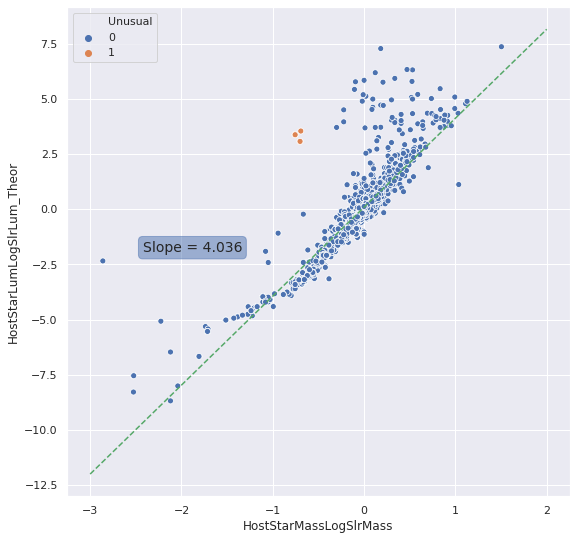

In [42]:
sns.set(color_codes=True)
ax = plt.subplots(figsize=(9, 9))
ax = sns.scatterplot(x=df_stars['HostStarMassLogSlrMass'], 
                 y=df_stars['HostStarLumLogSlrLum_Theor'],
                 hue=df_stars['Unusual'],
                 y_jitter=.03)
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'Slope = 4.036'
ax.text(0.15, 0.5, textstr, transform=ax.transAxes, fontsize=14, bbox=props)

# Plot the regression line for x=-3 and x = 2
slope = 4.03661584
intercept = 0.0978275
ya = -3 * slope + intercept
yb = 2 * slope + intercept
ax.plot((-3,2),(ya,yb), color='g', linestyle='--')

Ok, these unusual stars are far away our model. Another star is very untypical too, the one with a Lum ratio equal to -2.5 log and a Mass ratio near -3 log. I will try to identify it and see where it is on the H-R diagram.

In [43]:
df_stars[(df_stars['HostStarLumLogSlrLum_Theor'] > -2.5) & (df_stars['HostStarMassLogSlrMass'] < -2)]

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarTempK,HostStarAgeGyr,HostStarLumSlrLum_Theor,HostStarMassLogSlrMass,HostStarLumLogSlrLum_Theor,HostStarLumLogSlrLum_Model,ResidualsLumLogSlrLum,-2RMS,+2RMS,RelationMassLum,RedGiant,WhiteDwarf,rg_incorrect,Unusual
2143,0.0572,0.55,4340.0,1.9,0.096288,-2.861201,-2.340407,-11.451743,-9.111336,-12.864865,-10.038621,incorrect,0,0,false,0


This is the star which the id 2143. This star have :
- a Surface temperature equal to 4 340 Kelvin,
- a Luminosity equal to  0.096 Solar units,
- a Radius equal to 0.55 Solar radius.

This star belongs to main sequence.

# Conclusion

In the first Part, I found that 3% of stars (90 stars in 3119 in our dataset) were not following the mass-luminosity relationship and we know that this law does not apply to red giants or white dwarfs. 

I found that 39 stars of these 90 stars not following the law are Red Giants, meaning 43%. As we don't have White Dwarfs on the dataset, the other part of stars not following the law are stars belonging to the main sequence.